# Running basic phi calculation from pyphi

In [28]:
import networkx as nx
from networkx.drawing.nx_pydot import pydot_layout
import pandas as pd
from pprint import pprint as pp
import graphiit

import pyphi.data_models as dm  # Prototype code
from pyphi.zap_tc import Zaptc
from pyphi.convert import sbs2sbn, sbn2sbs      

In [19]:
>>> import pyphi
>>> import numpy as np
>>> tpm = np.array([
...     [0, 0, 0],
...     [0, 0, 1],
...     [1, 0, 1],
...     [1, 0, 0],
...     [1, 1, 0],
...     [1, 1, 1],
...     [1, 1, 1],
...     [1, 1, 0]
... ])
>>> cm = np.array([
...     [0, 0, 1],
...     [1, 0, 1],
...     [1, 1, 0]
... ])
>>> labels = ('A', 'B', 'C')
>>> network = pyphi.Network(tpm, cm=cm, node_labels=labels)
>>> state = (1, 0, 0)
# state = (0, 1, 0)  # ERROR
>>> node_indices = (0, 1, 2)
>>> subsystem = pyphi.Subsystem(network, state, node_indices)

>>> %time pyphi.compute.phi(subsystem) # => 2.3125

CPU times: user 24.1 ms, sys: 111 ms, total: 135 ms
Wall time: 201 ms


2.3125

Computing concepts:   0%|          | 0/7 [00:00<?, ?it/s]

edges(5)=[('A', 'C'), ('B', 'A'), ('B', 'C'), ('C', 'A'), ('C', 'B')]
Name: 
Type: DiGraph
Number of nodes: 3
Number of edges: 5
Average in degree:   1.6667
Average out degree:   1.6667
Calculating Φ at state=[1, 0, 0]


CPU times: user 17.8 ms, sys: 108 ms, total: 126 ms
Wall time: 151 ms


2.3125

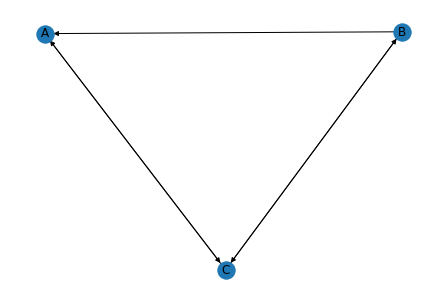

In [22]:
g=nx.from_numpy_array(cm,create_using=nx.DiGraph)
gn3 = dm.Gnet(g, tpm).draw()
print(f'edges({len(gn.graph.edges())})={gn.graph.edges()}')
print(nx.info(g))
#gn.phi(state=(1,0,0))
%time gn3.phi(statestr='100')

# Contrive network of multiple subgraphs

## Example 3 node network

### Try one

In [27]:
net3 = gn3.legacy_network
print(f'cm=\n{net3._cm} \ntpm=\n{net3._tpm}')
net3

cm=
[[0. 0. 1.]
 [1. 0. 1.]
 [1. 1. 0.]] 
tpm=
[[[[0. 0. 0.]
   [1. 1. 0.]]

  [[1. 0. 1.]
   [1. 1. 1.]]]


 [[[0. 0. 1.]
   [1. 1. 1.]]

  [[1. 0. 0.]
   [1. 1. 0.]]]]


Network([[[[0. 0. 0.]
   [1. 1. 0.]]

  [[1. 0. 1.]
   [1. 1. 1.]]]


 [[[0. 0. 1.]
   [1. 1. 1.]]

  [[1. 0. 0.]
   [1. 1. 0.]]]], cm=[[0. 0. 1.]
 [1. 0. 1.]
 [1. 1. 0.]])

In [ ]:
edges=[('A', 'C'), ('B', 'A'), ('B', 'C'), ('C', 'A'), ('C', 'B')]
G = nx.DiGraph(edges)

In [21]:
%time gn.phi(statestr='100')

Computing concepts:   0%|          | 0/7 [00:00<?, ?it/s]

Calculating Φ at state=[1, 0, 0]


CPU times: user 15.7 ms, sys: 126 ms, total: 142 ms
Wall time: 186 ms


2.3125

## Try combined;  4 x (3 node network)

gn.graph

## Try one

Name: 
Type: DiGraph
Number of nodes: 7
Number of edges: 12
Average in degree:   1.7143
Average out degree:   1.7143
discover_tpm of 7 nodes over 10 time_steps
edges=[(0, 1), (1, 4), (1, 3), (2, 3), (3, 0), (3, 2), (3, 5), (3, 6), (4, 3), (4, 5), (5, 4), (6, 2)] n_list=[0, 1, 2, 3, 4, 5, 6]
Gathering system state transition counts (time=10) ...
DONE


Computing concepts:   0%|          | 0/127 [00:00<?, ?it/s]

Calculating Φ at state=[0, 0, 1, 0, 0, 0, 0]


CPU times: user 880 ms, sys: 141 ms, total: 1.02 s
Wall time: 13.9 s


9.4e-05

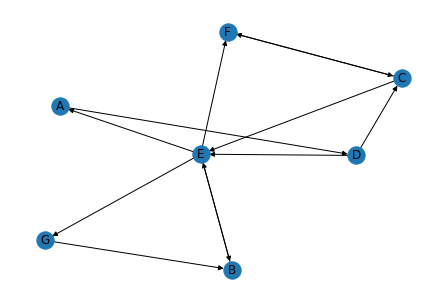

In [4]:
edges = [('A', 'D'), ('B', 'E'), ('C', 'E'), ('C', 'F'), ('D', 'C'), ('D', 'E'), ('E', 'A'), ('E', 'B'), ('E', 'F'), ('E', 'G'), ('F', 'C'), ('G', 'B')]
G = nx.DiGraph(edges)
print(nx.info(G))
gn = dm.Gnet(G).draw()
%time gn.phi('0010000')

In [30]:
gn.graph.nodes

NodeView(('A', 'B', 'C'))

## Try combined; 3 x (7 node network)

Name: 
Type: DiGraph
Number of nodes: 21
Number of edges: 36
Average in degree:   1.7143
Average out degree:   1.7143
discover_tpm of 21 nodes over 10 time_steps
edges=[(0, 1), (1, 4), (1, 3), (2, 3), (3, 0), (3, 2), (3, 5), (3, 6), (4, 3), (4, 5), (5, 4), (6, 2), (7, 8), (8, 11), (8, 10), (9, 10), (10, 7), (10, 9), (10, 12), (10, 13), (11, 10), (11, 12), (12, 11), (13, 9), (14, 15), (15, 18), (15, 17), (16, 17), (17, 14), (17, 16), (17, 19), (17, 20), (18, 17), (18, 19), (19, 18), (20, 16)] n_list=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Gathering system state transition counts (time=10) ...
DONE
edges(36)=[('A', 'B'), ('B', 'E'), ('B', 'D'), ('C', 'D'), ('D', 'A'), ('D', 'C'), ('D', 'F'), ('D', 'G'), ('E', 'D'), ('E', 'F'), ('F', 'E'), ('G', 'C'), ('H', 'I'), ('I', 'L'), ('I', 'K'), ('J', 'K'), ('K', 'H'), ('K', 'J'), ('K', 'M'), ('K', 'N'), ('L', 'K'), ('L', 'M'), ('M', 'L'), ('N', 'J'), ('O', 'P'), ('P', 'S'), ('P', 'R'), ('Q', 'R'), ('R', 'O'), ('

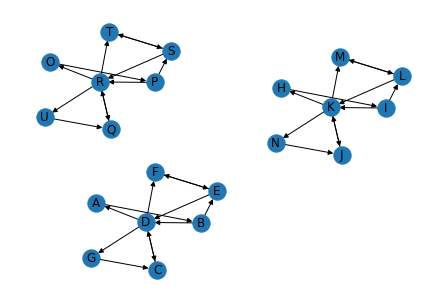

In [5]:
edges = [('A', 'D'), ('B', 'E'), ('C', 'E'), ('C', 'F'), ('D', 'C'), ('D', 'E'), ('E', 'A'), ('E', 'B'), ('E', 'F'), ('E', 'G'), ('F', 'C'), ('G', 'B')]
g = nx.DiGraph(edges)
h = nx.DiGraph(edges)
#print(nx.info(g))
G = nx.disjoint_union(g,h)
G = nx.disjoint_union(G,h)
print(nx.info(G))
gn = dm.Gnet(G).draw()
print(f'edges({len(gn.graph.edges())})={gn.graph.edges()}')
print(nx.info(G))

In [6]:
gn.tpm

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
000000000000000000000,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,...,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619
000000000000000000001,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,...,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619
000000000000000000010,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,...,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619
000000000000000000011,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,...,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619
000000000000000000100,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,...,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111111111111111111011,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,...,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619
111111111111111111100,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,...,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619
111111111111111111101,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,...,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619
111111111111111111110,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,...,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619


In [18]:
%time gn.phi() # random state

Calculating Φ at state=[0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1]
CPU times: user 1.18 s, sys: 168 ms, total: 1.35 s
Wall time: 1.35 s


0.0

In [8]:
2**21

2097152

In [9]:
gn.tpm.shape

(2097152, 21)

In [10]:
len(gn.graph.edges)

36

In [11]:
gn.tpm.index

Index(['000000000000000000000', '000000000000000000001',
       '000000000000000000010', '000000000000000000011',
       '000000000000000000100', '000000000000000000101',
       '000000000000000000110', '000000000000000000111',
       '000000000000000001000', '000000000000000001001',
       ...
       '111111111111111110110', '111111111111111110111',
       '111111111111111111000', '111111111111111111001',
       '111111111111111111010', '111111111111111111011',
       '111111111111111111100', '111111111111111111101',
       '111111111111111111110', '111111111111111111111'],
      dtype='object', length=2097152)

In [12]:
gn.tpm.loc[['000011010101101011111']].any(axis='columns')

000011010101101011111    True
dtype: bool

In [13]:
gn.tpm.any(axis='columns')

000000000000000000000    True
000000000000000000001    True
000000000000000000010    True
000000000000000000011    True
000000000000000000100    True
                         ... 
111111111111111111011    True
111111111111111111100    True
111111111111111111101    True
111111111111111111110    True
111111111111111111111    True
Length: 2097152, dtype: bool

----------------
# STOP HERE

In [14]:
# don't go beyond here with Run All
assert False

AssertionError: 

In [ ]:
N=7
p=0.3
S=2
G = nx.gnp_random_graph(N, p, directed=True) # num_nodes, prob_edge
edges = [('A', 'D'), ('B', 'E'), ('C', 'E'), ('C', 'F'), ('D', 'C'), ('D', 'E'), ('E', 'A'), ('E', 'B'), ('E', 'F'), ('E', 'G'), ('F', 'C'), ('G', 'B')]
G = nx.DiGraph()
G.add_edges_from(edges)

#nx.draw(G, os=pydot_layout(G), with_labels=True)
#edges = list(G.edges())
#net = dm.Net(edges=edges, SpN=S)
gn = dm.Gnet(G).draw()
print(f'edges({len(gn.graph.edges())})={gn.graph.edges()}')
print(nx.info(G))

In [ ]:
#gn.discover_tpm()
cur_state = '0' * len(gn.graph)
%time gn.phi(statestr=cur_state)

### Minimum time

In [ ]:
%time gn.phi('1010000')

### Maximum time

In [ ]:
%time gn.phi('0000010')

### Minimum Phi

In [ ]:
%time gn.phi('0111111')

### Maximum Phi

In [ ]:
%time gn.phi('1010000')

## Try one

In [ ]:
%time gn.phi() # random state

In [ ]:
N=7
p=0.3
S=2
G = nx.gnp_random_graph(N, p, directed=True) # num_nodes, prob_edge
edges = [('A', 'C'), ('A', 'E'), ('B', 'D'), ('B', 'E'), ('B', 'F'), ('B', 'G'), ('C', 'A'), ('C', 'B'), ('C', 'D'), ('C', 'F'), ('D', 'C'), ('D', 'G'), ('E', 'C'), ('E', 'D'), ('E', 'F'), ('F', 'C'), ('G', 'A'), ('G', 'E')]
G = nx.DiGraph()
G.add_edges_from(edges)  # Long running (more than 50 minutes?)

#nx.draw(G, os=pydot_layout(G), with_labels=True)
#edges = list(G.edges())
#net = dm.Net(edges=edges, SpN=S)
gn = dm.Gnet(G).draw()
print(f'edges({len(gn.graph.edges())})={gn.graph.edges()}')
print(nx.info(G))

In [ ]:
%time gn.phi() # random state

In [ ]:
gn.discover_tpm()

In [ ]:
%time gn.phi()